In [1]:
import os
import neonutilities as nu
import rasterio as rio
from rasterio.plot import show, show_hist
import numpy as np
from math import floor
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [11]:
# Download the CHM Data to the ./data folder
nu.by_tile_aop(dpid="DP3.30015.001",
               site="CPER", 
               year=2020,
               easting=519000, 
               northing=4520000, 
               savepath=os.path.expanduser("~/LiDAR_Uncertainty/CPER_data"))

Provisional NEON data are not included. To download provisional data, use input parameter include_provisional=True.


100%|██████████| 25/25 [00:01<00:00, 14.34it/s]


In [12]:
# Download the DEM (DSM & DTM) Data to the ./data folder
nu.by_tile_aop(dpid="DP3.30024.001",
               site="CPER", 
               year=2020,
               easting=519000, 
               northing=4520000, 
               savepath=os.path.expanduser("~/LiDAR_Uncertainty/CPER_data"))

Provisional NEON data are not included. To download provisional data, use input parameter include_provisional=True.


100%|██████████| 28/28 [00:02<00:00, 12.11it/s]


In [13]:
def list_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.tif'):
                print(os.path.join(root, file).replace(os.path.expanduser('~/Downloads/'),'..'))

# Replace 'your_directory_path' with the path to the directory you want to search
chm_dir = os.path.expanduser("~/LiDAR_Uncertainty/CPER_data/DP3.30015.001")
dem_dir = os.path.expanduser("~/LiDAR_Uncertainty/CPER_data/DP3.30024.001")
list_files(chm_dir)
list_files(dem_dir)

/Users/kitlewers/LiDAR_Uncertainty/CPER_data/DP3.30015.001/neon-aop-products/2020/FullSite/D10/2020_CPER_7/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D10_CPER_DP3_519000_4520000_CHM.tif
/Users/kitlewers/LiDAR_Uncertainty/CPER_data/DP3.30015.001/neon-aop-products/2020/FullSite/D10/2020_CPER_6/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D10_CPER_DP3_519000_4520000_CHM.tif
/Users/kitlewers/LiDAR_Uncertainty/CPER_data/DP3.30015.001/neon-aop-products/2020/FullSite/D10/2020_CPER_5/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D10_CPER_DP3_519000_4520000_CHM.tif
/Users/kitlewers/LiDAR_Uncertainty/CPER_data/DP3.30024.001/neon-aop-products/2020/FullSite/D10/2020_CPER_7/L3/DiscreteLidar/DTMGtif/NEON_D10_CPER_DP3_519000_4520000_DTM.tif
/Users/kitlewers/LiDAR_Uncertainty/CPER_data/DP3.30024.001/neon-aop-products/2020/FullSite/D10/2020_CPER_7/L3/DiscreteLidar/DSMGtif/NEON_D10_CPER_DP3_519000_4520000_DSM.tif
/Users/kitlewers/LiDAR_Uncertainty/CPER_data/DP3.30024.001/neon-aop-products/2020/FullSite/D1

In [14]:
# Define base directories
chm_dir = os.path.expanduser("~/LiDAR_Uncertainty/CPER_data/DP3.30015.001")
dem_dir = os.path.expanduser("~/LiDAR_Uncertainty/CPER_data/DP3.30024.001")

# Define file paths for CPER_5, CPER_6, and CPER_7
chm5_fname = os.path.join(chm_dir, 'neon-aop-products/2020/FullSite/D10/2020_CPER_5/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D10_CPER_DP3_519000_4520000_CHM.tif')
dsm5_fname = os.path.join(dem_dir, 'neon-aop-products/2020/FullSite/D10/2020_CPER_5/L3/DiscreteLidar/DSMGtif/NEON_D10_CPER_DP3_519000_4520000_DSM.tif')
dtm5_fname = os.path.join(dem_dir, 'neon-aop-products/2020/FullSite/D10/2020_CPER_5/L3/DiscreteLidar/DTMGtif/NEON_D10_CPER_DP3_519000_4520000_DTM.tif')

chm6_fname = os.path.join(chm_dir, 'neon-aop-products/2020/FullSite/D10/2020_CPER_6/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D10_CPER_DP3_519000_4520000_CHM.tif')
dsm6_fname = os.path.join(dem_dir, 'neon-aop-products/2020/FullSite/D10/2020_CPER_6/L3/DiscreteLidar/DSMGtif/NEON_D10_CPER_DP3_519000_4520000_DSM.tif')
dtm6_fname = os.path.join(dem_dir, 'neon-aop-products/2020/FullSite/D10/2020_CPER_6/L3/DiscreteLidar/DTMGtif/NEON_D10_CPER_DP3_519000_4520000_DTM.tif')

chm7_fname = os.path.join(chm_dir, 'neon-aop-products/2020/FullSite/D10/2020_CPER_7/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D10_CPER_DP3_519000_4520000_CHM.tif')
dsm7_fname = os.path.join(dem_dir, 'neon-aop-products/2020/FullSite/D10/2020_CPER_7/L3/DiscreteLidar/DSMGtif/NEON_D10_CPER_DP3_519000_4520000_DSM.tif')
dtm7_fname = os.path.join(dem_dir, 'neon-aop-products/2020/FullSite/D10/2020_CPER_7/L3/DiscreteLidar/DTMGtif/NEON_D10_CPER_DP3_519000_4520000_DTM.tif')

In [16]:
chm1_dataset = rio.open(chm5_fname)
dsm1_dataset = rio.open(dsm5_fname)
dtm1_dataset = rio.open(dtm5_fname)

chm2_dataset = rio.open(chm6_fname)
dsm2_dataset = rio.open(dsm6_fname)
dtm2_dataset = rio.open(dtm6_fname)

chm3_dataset = rio.open(chm7_fname)
dsm3_dataset = rio.open(dsm7_fname)
dtm3_dataset = rio.open(dtm7_fname)

CPLE_AppDefined in NEON_D10_CPER_DP3_519000_4520000_DSM.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
CPLE_AppDefined in NEON_D10_CPER_DP3_519000_4520000_DTM.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
CPLE_AppDefined in NEON_D10_CPER_DP3_519000_4520000_DSM.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
CPLE_AppDefined in NEON_D10_CPER_DP3_519000_4520000_DTM.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
CPLE_AppDefined in NEON_D10_CPER_DP3_519000_4520000_CHM.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
CPLE_AppDefined in NEON_D10_CPER_DP3_519000_4520000_DSM.tif: TIFFReadDirectoryCheckOrder:Invalid TIFF directory; tags are not sorted in ascending order
CPLE_AppDefined in NEON_D10_CPER_DP3_519000_4520000_DTM.tif: TIFFReadDirectoryCheckOrder

Text(0.5, 1.0, '2020_CPER_2 DSM')

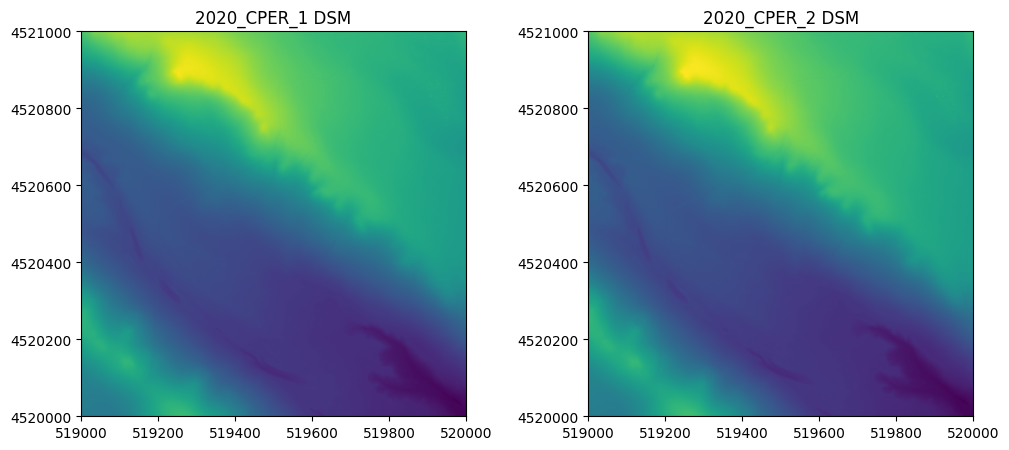

In [19]:
# Display the DSMs from the 1st and 2nd collections:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
show(dsm1_dataset, ax=ax1); ax1.ticklabel_format(style='plain'); ax1.set_title('2020_CPER_1 DSM')
show(dsm2_dataset, ax=ax2); ax2.ticklabel_format(style='plain'); ax2.set_title('2020_CPER_2 DSM')


In [23]:
dsm1_data = dsm1_dataset.read(1)
dsm2_data = dsm2_dataset.read(1)
diff_dsm_array = np.subtract(dsm1_data,dsm2_data)

In [24]:
diff_dsm_array_mean = np.mean(diff_dsm_array)
diff_dsm_array_std = np.std(diff_dsm_array)
print('Mean difference in DSMs: ',round(diff_dsm_array_mean,3),'m')
print('Standard deviation of difference in DSMs: ',round(diff_dsm_array_std,3),'m')

Mean difference in DSMs:  -0.051 m
Standard deviation of difference in DSMs:  0.032 m


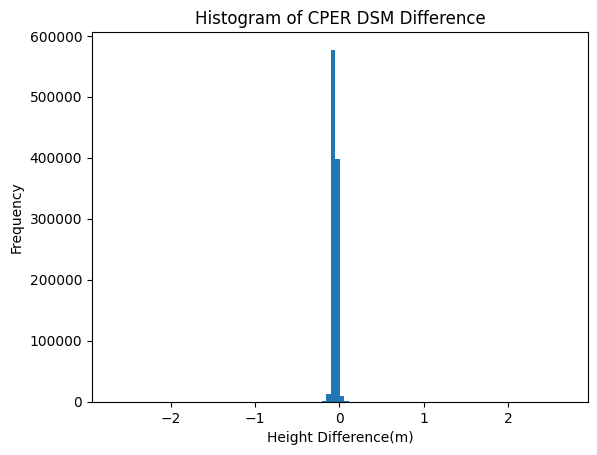

In [25]:
plt.figure()
plt.hist(diff_dsm_array.flatten(),100)
plt.title('Histogram of CPER DSM Difference')
plt.xlabel('Height Difference(m)'); plt.ylabel('Frequency')
plt.show()

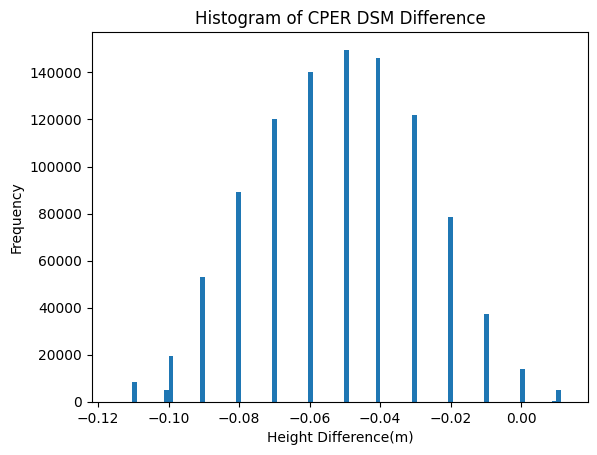

In [26]:
plt.figure()
plt.hist(diff_dsm_array.flatten(),100,range=[diff_dsm_array_mean-2*diff_dsm_array_std, diff_dsm_array_mean+2*diff_dsm_array_std]);
plt.title('Histogram of CPER DSM Difference')
plt.xlabel('Height Difference(m)'); plt.ylabel('Frequency')
plt.show()

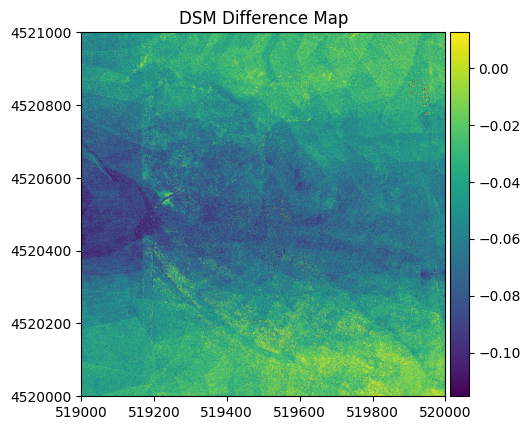

In [27]:
# define the min and max histogram values
dsm_diff_vmin = diff_dsm_array_mean-2*diff_dsm_array_std
dsm_diff_vmax = diff_dsm_array_mean+2*diff_dsm_array_std

# get the extent (bounds) from dsm1_dataset
left, bottom, right, top = dsm1_dataset.bounds
ext = [left, right, bottom, top]

# Plot, with some formatting to make it look nice
fig, ax = plt.subplots(1, 1, figsize=(5,6))
dsm_diff_map = show(diff_dsm_array,vmin=dsm_diff_vmin, vmax=dsm_diff_vmax, extent = ext, ax = ax, cmap='viridis')
im = dsm_diff_map.get_images()[0]
divider = make_axes_locatable(ax) 
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
ax.ticklabel_format(style='plain'); # don't use scientific notation on the y-axis
ax.set_title('DSM Difference Map');

In [28]:
dtm1_data = dtm1_dataset.read(1)
dtm2_data = dtm2_dataset.read(1)
diff_dtm_array = np.subtract(dtm1_data,dtm2_data)

In [29]:
diff_dtm_array_mean = np.mean(diff_dtm_array)
diff_dtm_array_std = np.std(diff_dtm_array)
print('Mean difference in DTMs: ',round(diff_dtm_array_mean,3),'m')
print('Standard deviation of difference in DTMs: ',round(diff_dtm_array_std,3),'m')

Mean difference in DTMs:  -0.051 m
Standard deviation of difference in DTMs:  0.031 m


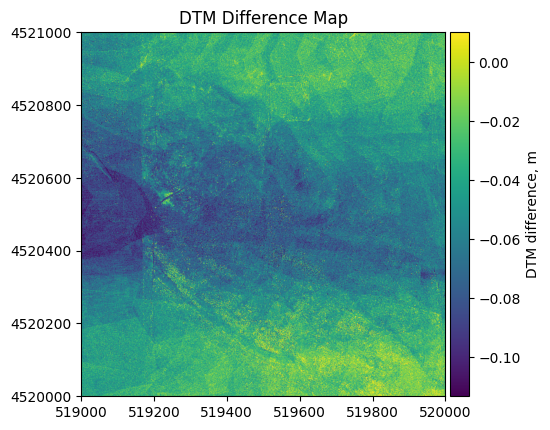

In [30]:
dtm_diff_vmin = diff_dtm_array_mean-2*diff_dtm_array_std
dtm_diff_vmax = diff_dtm_array_mean+2*diff_dtm_array_std

# Plot, with some formatting to make it look nice
fig, ax = plt.subplots(1, 1, figsize=(5,6))
dtm_diff_map = show(diff_dtm_array,vmin=dtm_diff_vmin, vmax=dtm_diff_vmax, extent = ext, ax = ax, cmap='viridis');
im = dtm_diff_map.get_images()[0]
divider = make_axes_locatable(ax) 
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('DTM difference, m')
ax.ticklabel_format(style='plain');
ax.set_title('DTM Difference Map');

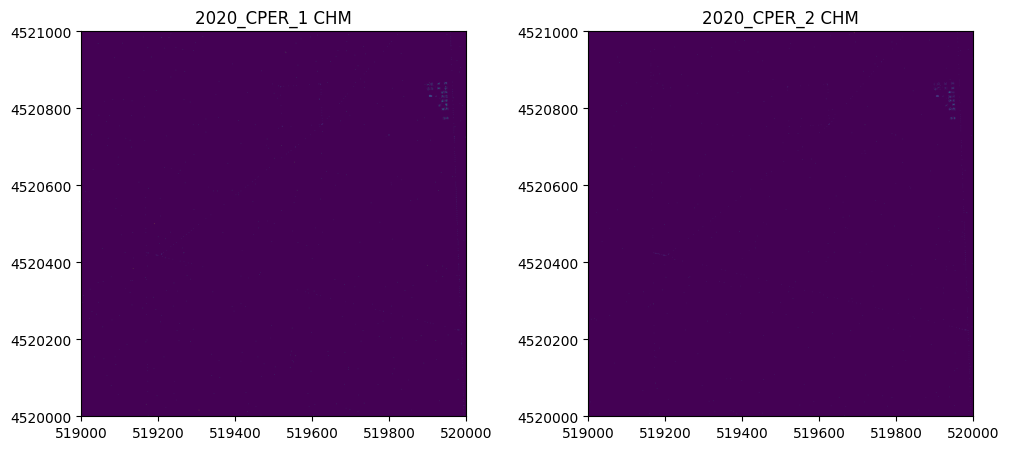

In [31]:
# Display the CHMs from the 1st and 2nd collections:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
show(chm1_dataset, ax=ax1); ax1.ticklabel_format(style='plain'); ax1.set_title('2020_CPER_1 CHM')
show(chm2_dataset, ax=ax2); ax2.ticklabel_format(style='plain'); ax2.set_title('2020_CPER_2 CHM');

In [32]:
chm1_data = chm1_dataset.read(1)
diff_dsm_array_veg_mean = np.nanmean(diff_dsm_array[chm1_data!=0.0])
diff_dsm_array_veg_std = np.nanstd(diff_dsm_array[chm1_data!=0.0])
print('Mean difference in DSMs on veg points: ',round(diff_dsm_array_veg_mean,3),'m')
print('Standard deviations of difference in DSMs on veg points: ',round(diff_dsm_array_veg_std,3),'m')

Mean difference in DSMs on veg points:  0.088 m
Standard deviations of difference in DSMs on veg points:  0.438 m


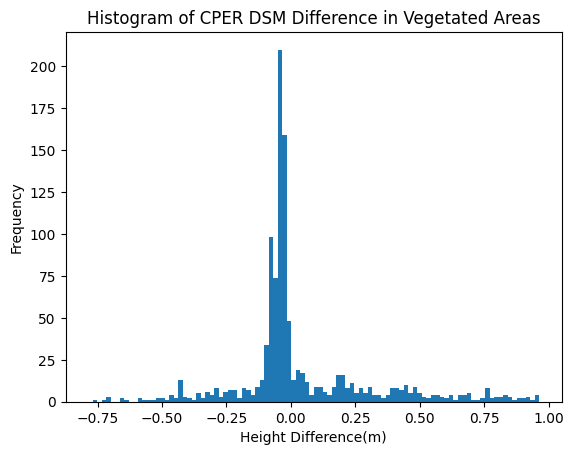

In [34]:
plt.figure();
diff_dsm_array_nodata_removed = diff_dsm_array[~np.isnan(diff_dsm_array)]
chm_dsm_nodata_removed = chm1_data[~np.isnan(diff_dsm_array)]

dsm_diff_veg_vmin = diff_dsm_array_veg_mean-2*diff_dsm_array_veg_std
dsm_diff_veg_vmax = diff_dsm_array_veg_mean+2*diff_dsm_array_veg_std

plt.hist(diff_dsm_array_nodata_removed[chm_dsm_nodata_removed!=0.0],100,range=[dsm_diff_veg_vmin, dsm_diff_veg_vmax])
plt.title('Histogram of CPER DSM Difference in Vegetated Areas')
plt.xlabel('Height Difference(m)'); plt.ylabel('Frequency');

In [35]:
diff_dtm_array_veg_mean = np.nanmean(diff_dtm_array[chm1_data!=0.0])
diff_dtm_array_veg_std = np.nanstd(diff_dtm_array[chm1_data!=0.0])
print('Mean difference in DTMs on vegetated pixels: ',round(diff_dtm_array_veg_mean,3),'m')
print('Standard deviations of difference in DTMs on vegetated pixels: ',round(diff_dtm_array_veg_std,3),'m')

Mean difference in DTMs on vegetated pixels:  -0.072 m
Standard deviations of difference in DTMs on vegetated pixels:  0.233 m


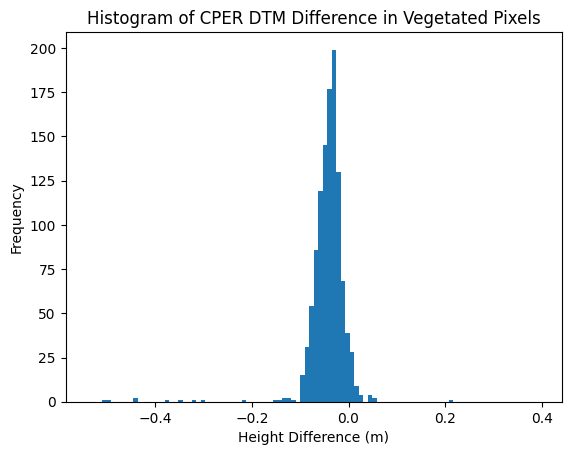

In [37]:
dtm_diff_veg_vmin = diff_dtm_array_veg_mean-2*diff_dtm_array_veg_std
dtm_diff_veg_vmax = diff_dtm_array_veg_mean+2*diff_dtm_array_veg_std

diff_dtm_array_nodata_removed = diff_dtm_array[~np.isnan(diff_dtm_array)] 
chm_dtm_nodata_removed = chm1_data[~np.isnan(diff_dtm_array)]
plt.hist((diff_dtm_array_nodata_removed[chm_dtm_nodata_removed!=0.0]),100,range=[dtm_diff_veg_vmin, dtm_diff_veg_vmax]);
plt.title('Histogram of CPER DTM Difference in Vegetated Pixels');
plt.xlabel('Height Difference (m)'); plt.ylabel('Frequency');

In [38]:
diff_dtm_array_ground_mean = np.nanmean(diff_dtm_array[chm1_data==0.0])
diff_dtm_array_ground_std = np.nanstd(diff_dtm_array[chm1_data==0.0])
print('Mean difference in DTMs on ground points: ',round(diff_dtm_array_ground_mean,3),'m')
print('Standard deviations of difference in DTMs on ground points: ',round(diff_dtm_array_ground_std,3),'m')

Mean difference in DTMs on ground points:  -0.051 m
Standard deviations of difference in DTMs on ground points:  0.03 m


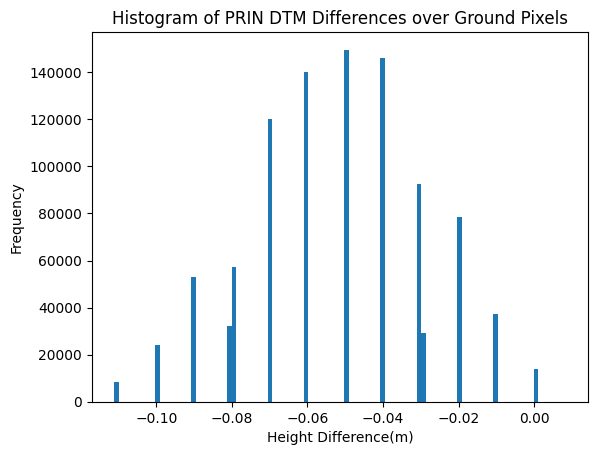

In [ ]:
dtm_diff_gnd_vmin = diff_dtm_array_ground_mean-2*diff_dtm_array_ground_std
dtm_diff_gnd_vmax = diff_dtm_array_ground_mean+2*diff_dtm_array_ground_std

plt.hist((diff_dtm_array_nodata_removed[chm_dtm_nodata_removed==0.0]),100,range=[dtm_diff_gnd_vmin, dtm_diff_gnd_vmax])
plt.title('Histogram of CPER DTM Differences over Ground Pixels')
plt.xlabel('Height Difference(m)'); plt.ylabel('Frequency');